# Pymaceuticals Inc.
---

### Analysis

- Capomulin is the best drug for the treatment 
- 
 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [165]:
# Checking the number of mice.
mice_count = len(mouse_study_data.groupby("Mouse ID").count())
mice_count

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

#duplicate_mice = mouse_study_data[mouse_study_data.duplicated(["Mouse ID", "Timepoint"])]
#duplicate_mice

array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = mouse_study_data[mouse_study_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data = mouse_study_data.drop(duplicate_mice_data.index)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [169]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_data = len(clean_data.groupby("Mouse ID").count())
number_mice_clean_data

248

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean of the tumor volume
mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# median of the tumor volume 
median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# variance of the tumor volume 
variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

# standard deviation of the tumor volume
standard_deviation = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

# SEM of the tumor volume 
sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

resulting_series = pd.DataFrame({"Mean Tumor Volume": mean,
                                "Median Tumor Volume": median,
                                "Tumor Volume Variance": variance,
                                "Tumor Volume Std. Dev.": standard_deviation,
                                "Tumor Volume Std. Err.": sem})
resulting_series


C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\714136427.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\714136427.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\714136427.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_onl

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean",'median','var', 'std', 'sem'])
aggregation_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

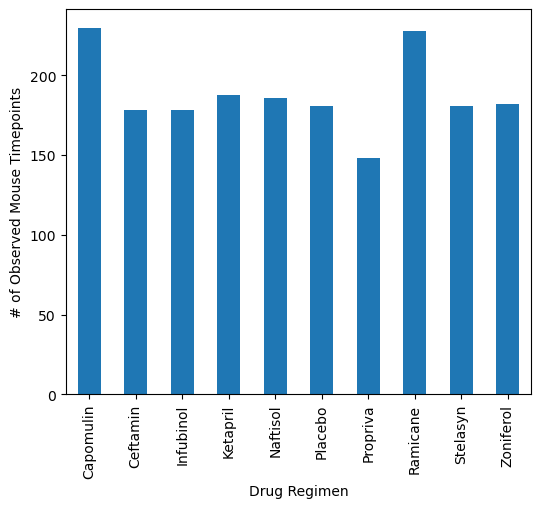

<Figure size 640x480 with 0 Axes>

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

clean_data_type = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar_plot_pandas = clean_data_type.plot(kind="bar", figsize=(6,5))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

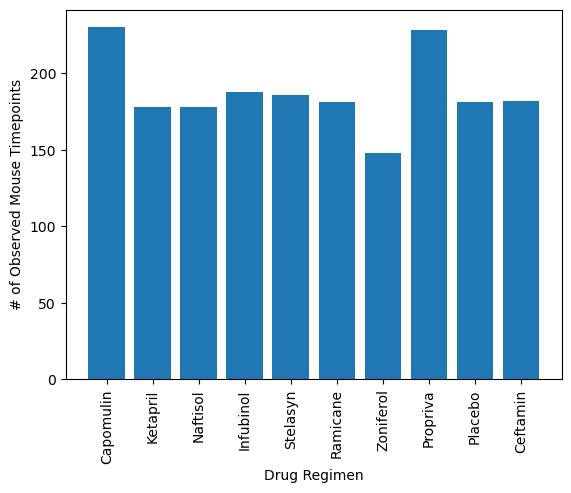

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen = clean_data['Drug Regimen'].unique()
x_axis = regimen
y_axis = clean_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations =  x_axis
    
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")  

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

<Axes: ylabel='Sex'>

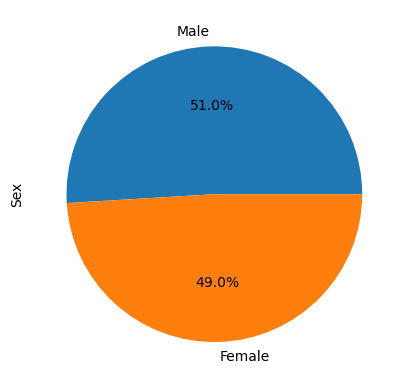

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_versus_male = clean_data["Sex"].value_counts()

female_versus_male.plot.pie(autopct="%1.1f%%")

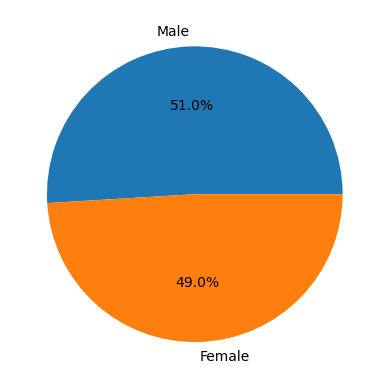

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_versus_male = clean_data["Sex"].value_counts()
labels = 'Male' , 'Female'
plt.pie(female_versus_male, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [188]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = clean_data.merge(greatest_timepoint, on=['Mouse ID', "Timepoint"])
merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [190]:
# Create empty list to fill with tumor vol data (for plotting)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumors=[]


# Put treatments into a list for for loop (and later for plot labels)
for drug in regimen:
    final_tumor= merge.loc[merge["Drug Regimen"] == drug,'Tumor Volume (mm3)']
   
    tumors.append(final_tumor)
    quartiles = final_tumor.quantile([.25, .50, .75])
    quartiles = pd.DataFrame(quartiles)
    tumors = pd.DataFrame(tumors)
    


lowerq = final_tumor.quantile([0.25]).mean()
upperq = final_tumor.quantile([0.75]).mean()
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumors in mice is: {lowerq}")
print(f"The upper quartile of tumors in mice is: {upperq}")
print(f"The interquartile range of tumors in mice is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumors in mice is: 48.72207785
The upper quartile of tumors in mice is: 64.29983003
The interquartile range of tumors in mice is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\2814553743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumors.append(final_tumor)
C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\2814553743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumors.append(final_tumor)
C:\Users\sanji\AppData\Local\Temp\ipykernel_13488\2814553743.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumors.append(final_tumor)


<function matplotlib.pyplot.show(close=None, block=None)>

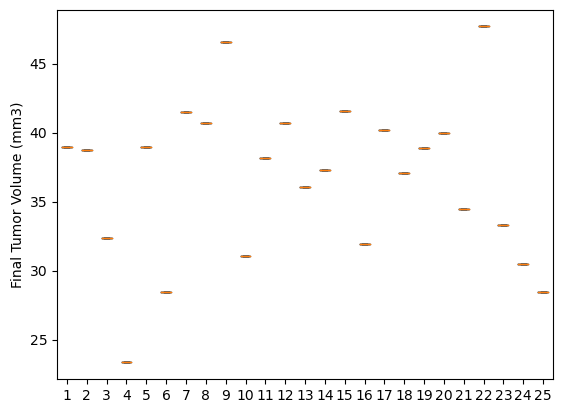

In [185]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()

plt.ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(tumors)
plt.show

## Line and Scatter Plots

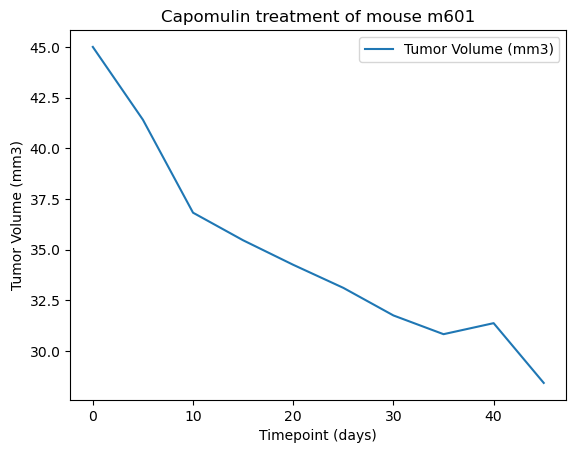

In [179]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_data.loc[clean_data['Mouse ID']== 'm601'].plot(x='Timepoint', y='Tumor Volume (mm3)')

plt.title('Capomulin treatment of mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

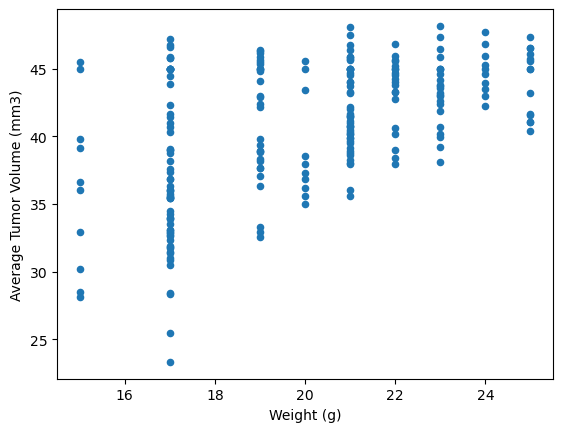

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

clean_data.loc[clean_data['Drug Regimen']== 'Capomulin'].plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

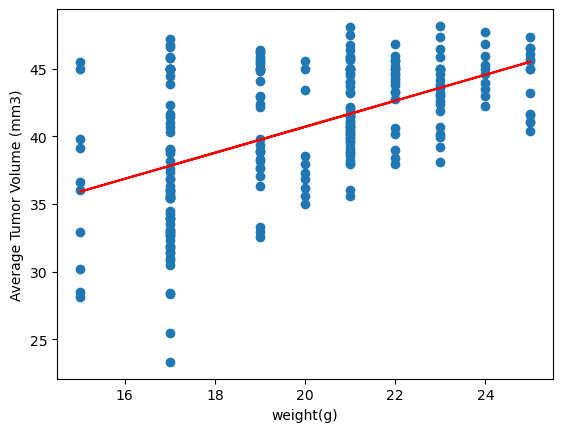

The correlation between both factors is 0.53


In [183]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Capomulin = clean_data.loc[clean_data['Drug Regimen']== 'Capomulin']
x_values = Capomulin['Weight (g)']
y_values = Capomulin['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")
